# Data Science and Business Analytics Internship

## Author : Charmi Daftari

## Task 5 - To Explore Business Analytics

Provided dataset : ‘SampleSuperstore’
* As a business manager, try to find out the weak areas where you can work to make more profit.
* What all business problems you can derive by exploring the data? 

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Install folium and then import it
# !conda install -c conda-forge folium=0.5.0 --yes
import folium

## Importing the dataset

In [3]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### There are no missing values in the dataset.

In [5]:
# Dropping all the duplicate values from the dataset.
df = df.drop_duplicates()
df.shape

(9977, 13)

## Performing Exploratory Data Analysis

In [6]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

Text(0.5, 1.0, 'Statistics of Sample SuperStore')

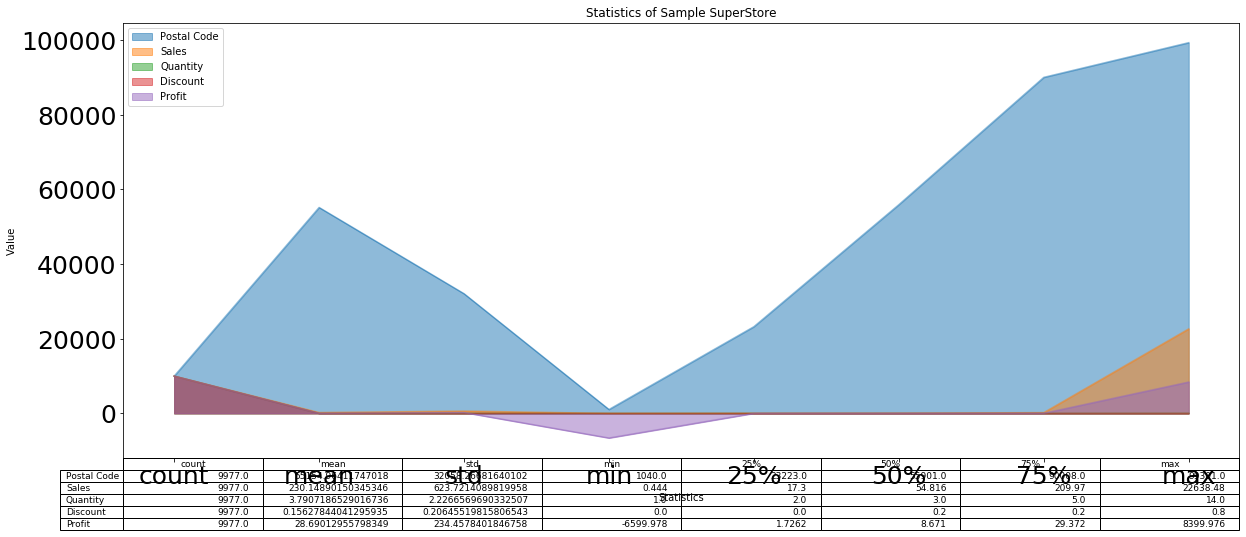

In [7]:
df.describe().plot(kind='area', figsize=(20, 8), fontsize=25, table=True, stacked=False)
plt.xlabel('Statistics')
plt.ylabel('Value')
plt.title('Statistics of Sample SuperStore')

It shows you statistical summary of all numerical values present in the dataset which includes count, mean, standard deviation, minimum, quartile range and maximum values.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


# Data Visualization

Text(0.5, 1.0, 'Category vs Profit')

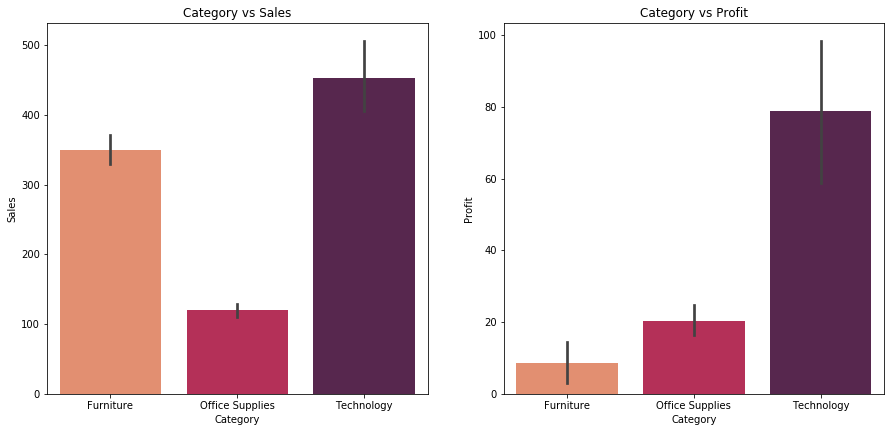

In [9]:
plt.figure(1, figsize=(15,15))
plt.subplot(2, 2, 1)
sns.barplot(x = 'Category', y='Sales', data=df, palette=("rocket_r"))
plt.title('Category vs Sales')

plt.subplot(2, 2, 2)
sns.barplot(x = 'Category', y='Profit', data=df, palette=("rocket_r"))
plt.title('Category vs Profit')

The graph between profit and sales is clearly shown. The sales of Furniture category is greater than profit. But as the sales of Technology category increases the profit also increases.

So to increase the profit in the business it advisable to stop the business of furniture or decrease it.

Text(0.5, 1.0, 'Region vs Profit')

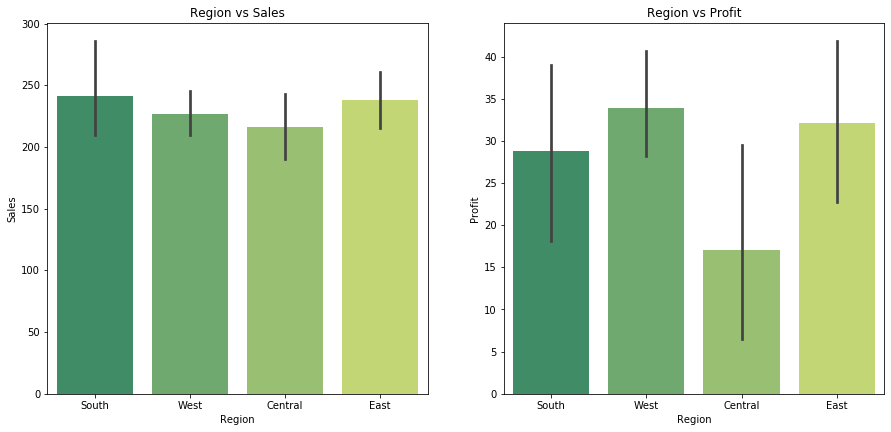

In [10]:
plt.figure(1, figsize=(15,15))
plt.subplot(2, 2, 1)
sns.barplot(x = 'Region', y='Sales', data=df, palette=("summer"))
plt.title('Region vs Sales')

plt.subplot(2, 2, 2)
sns.barplot(x = 'Region', y='Profit', data=df, palette=("summer"))
plt.title('Region vs Profit')

West Region has greater profit and Central Region has lesser profits. It is advisable to decrease sales in Central Region.

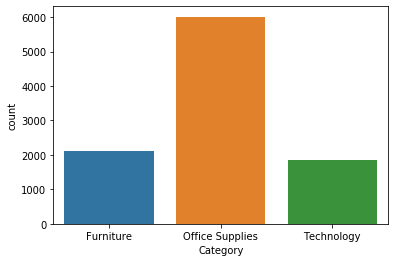

In [11]:
sns.countplot(df['Category'])

Office Supplies category has highest number of sales.

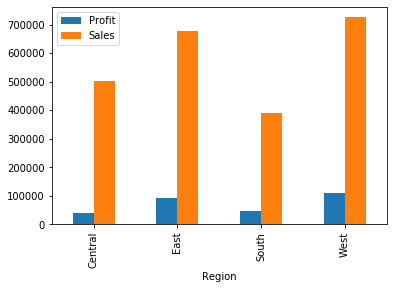

In [12]:
group_1 = df[['Region','Profit','Sales']]
test_1 = group_1.groupby(['Region'], as_index=False).sum()
test_1 = test_1.set_index('Region')
test_1.plot(kind='bar')

In [13]:
group_2 = df[['Category','Region','Profit']]
test_2 = group_2.groupby(['Category','Region'], as_index=False).mean()
pivot = test_2.pivot(index='Category', columns='Region')
pivot

Profit                                 
Region             Central       East      South       West
Category                                                   
Furniture        -6.054472   5.097041  20.395199  16.286869
Office Supplies   6.247068  23.968450  20.086827  27.821837
Technology       80.231981  88.714084  68.231506  73.962687

Technology shows the highest profit in all regions compared to others.

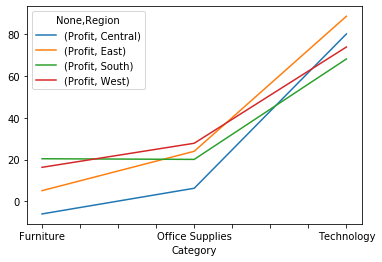

In [14]:
pivot.plot()

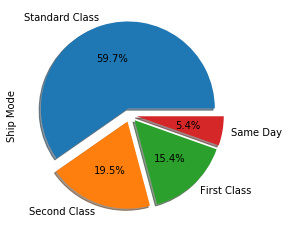

In [15]:
df['Ship Mode'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=[0.08,0.08,0.08,0.08])

Standard class has 59.7% sales which is the highest. The lowest is 5.4% having sales on the same day.

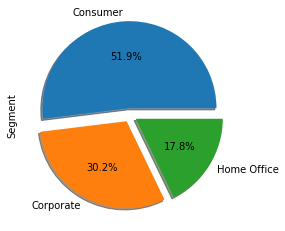

In [16]:
df['Segment'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=[0.08,0.08,0.08])

Consumer sales are 51.9% which is highest amongst the all and the lowest is of Home Office with 17.8%.

In [17]:
group_3 = df[['Category','Region','Profit']]
test_3 = group_3.groupby(['Category'], as_index=False).mean()
test_3

,Category,Profit
0,Furniture,8.697740
1,Office Supplies,20.353403
2,Technology,78.752002


In [18]:
group_4 = df[['Category','Sub-Category','Profit']]
test_4 = group_4.groupby(['Category','Sub-Category'], as_index=False).mean()
test_4 = test_4.set_index('Category')
test_4

,Sub-Category,Profit
Category,,
Furniture,Bookcases,-15.230509
Furniture,Chairs,43.198582
Furniture,Furnishings,13.653476
Furniture,Tables,-55.565771
Office Supplies,Appliances,38.922758
Office Supplies,Art,8.207059
Office Supplies,Binders,19.860710
Office Supplies,Envelopes,27.418019
Office Supplies,Fasteners,4.375660


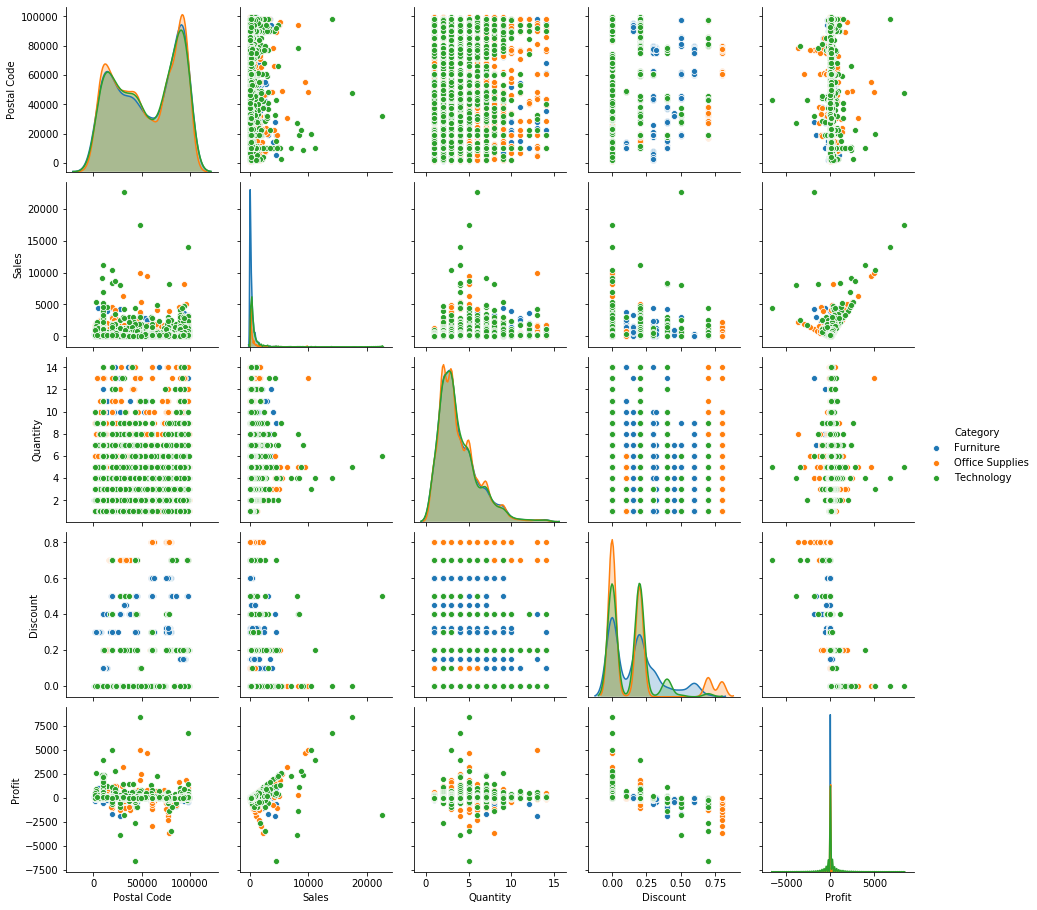

In [19]:
sns.pairplot(df, hue="Category")

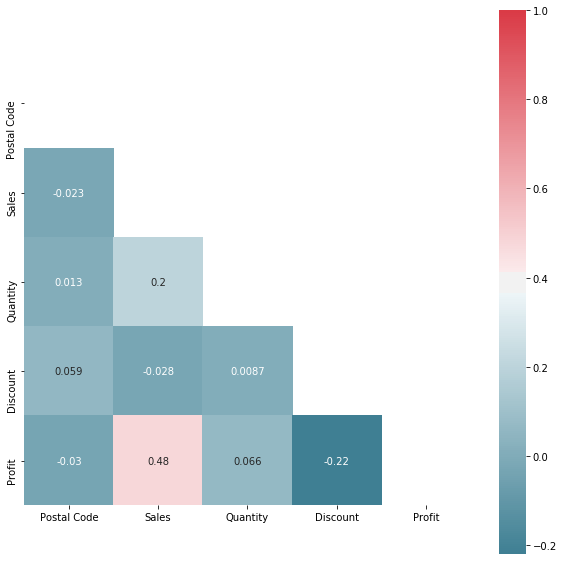

In [20]:
fig = plt.gcf() # Creates a new figure if no current exists
fig.set_size_inches(10,10)
dropSelf = np.zeros_like(df.corr())  # Extracts value with same shape
dropSelf[np.triu_indices_from(dropSelf)] = True # Extracts upper indices
colormap = sns.diverging_palette(220, 10, as_cmap=True)
fig = sns.heatmap(df.corr(), annot=True, square=True, cmap = colormap, mask= dropSelf)

It shows correlation between all numerical variables.

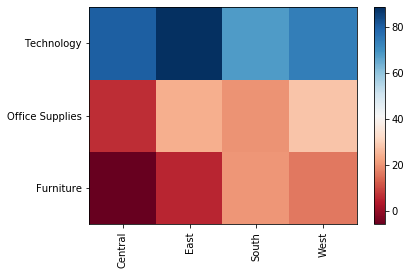

In [21]:
fig, ax = plt.subplots()
im = ax.pcolor(pivot, cmap='RdBu')

#label names
row_labels = pivot.columns.levels[1]
col_labels = pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [22]:
group_5 = df[['Category','State','Profit']]
test_5 = group_5.groupby(['State', 'Category'], as_index=False).mean()
pivot_2 = test_5.pivot(index='State', columns='Category')
pivot_2

Profit                            
Category               Furniture Office Supplies  Technology
State                                                       
Alabama               111.944382       34.934283  235.557350
Arizona               -56.018833       -6.263803    2.343775
Arkansas               86.828356       54.605375   84.095893
California             20.637310       31.599151   82.089239
Colorado              -52.610475       -3.886867  -99.188129
Connecticut            94.329269       25.935822   70.993964
Delaware               48.372622       49.441669  311.952540
District of Columbia  116.694500       10.157233  648.562400
Florida               -26.529185       -7.314960    7.692823
Georgia                64.045563       85.225440  118.909722
Idaho                  88.994417       18.241755   23.024325
Illinois              -73.790971      -29.394084   57.411419
Indiana                94.838057       53.616327  379.340597
Iowa                  130.009625       15.700236   79.592050
Kansas                 18.484800       36.734547   34.997320
Kentucky              107.033107       44.558919  180.723322
Louisiana              62.363145       24.754625   92.274109
Maine                  33.938800       42.378650   83.677600
Maryland               68.065264       60.356727   94.491257
Massachusetts          33.032506       47.466010   92.407900
Michigan               94.703149       94.373167  103.963098
Minnesota             155.683623      121.570305   84.900067
Mississippi           104.979956       37.628915   89.672945
Missouri               56.837900       65.029460  251.227233
Montana                21.753200       28.853990  380.758850
Nebraska              129.609100       21.428569  120.189375
Nevada                 58.285611       94.972908   85.474267
New Hampshire          25.656167       40.616156  180.541460
New Jersey             35.858819       56.269717  198.580857
New Mexico             62.897925       23.676733   37.475867
New York               24.820678       38.024885  202.821085
North Carolina        -83.011031       -2.699647  -70.260863
North Dakota                 NaN       32.878529         NaN
Ohio                  -45.589809       -0.420129 -124.019021
Oklahoma              143.590813       30.248473  112.921450
Oregon                -70.836995        2.228283    4.679867
Pennsylvania          -57.573759      -15.138778  -26.816988
Rhode Island           57.086063       57.233548  510.890256
South Carolina        102.140650       23.420840   75.597917
South Dakota           33.594900       24.217737   66.948300
Tennessee             -49.080647      -27.111002    3.301685
Texas                 -51.664069      -30.907426   18.387872
Utah                   90.250814       34.180582   83.105014
Vermont               595.963500      100.960833  149.095433
Virginia              100.083202       44.013746  205.770956
Washington             63.604995       38.621210  150.193435
West Virginia         -76.953600       87.625067         NaN
Wisconsin             119.967328       37.090117  103.882788
Wyoming               100.196000             NaN         NaN

In [23]:
pivot_2 = pivot_2.reset_index()
pivot_2['Total'] = pivot_2.sum(axis=1)

In [24]:
world_geo = r'us_states.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[40, -100], zoom_start=4, tiles='Mapbox Bright')

In [25]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=pivot_2,
    columns=['State', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Profit in the States of US',
)

# display map
world_map

# Conclusion:

* Sales of Furniture Category should be decreased and that of Technology Category to be increased.

* Profit in the Central Region in compartively lesser.

* In the Segment class, Customer buying is the highest than Corporates and Home Office.

* In the Ship Mode class, Standard Class category has highest sales compared to others.